In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "calabria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,18,Calabria,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,18,Calabria,0,0,0,1,1,1,1,...,0.0,7.0,0.0,1.0,0.00,0.00,14.29,0.00,0.00,0.00
4,2020-02-29T17:00:00,18,Calabria,0,0,0,1,1,0,0,...,0.0,6.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-01-01T17:00:00,18,Calabria,233,18,251,8612,8863,46,345,...,7.0,1903.0,1782.0,56.0,7.17,2.83,18.13,19.36,0.00,0.52
312,2021-01-02T17:00:00,18,Calabria,234,19,253,8563,8816,-47,175,...,3.0,1063.0,860.0,-49.0,7.51,2.87,16.46,20.35,5.56,-0.53
313,2021-01-03T17:00:00,18,Calabria,242,19,261,8396,8657,-159,150,...,6.0,1546.0,1411.0,-167.0,7.28,3.01,9.70,10.63,0.00,-1.80
314,2021-01-04T17:00:00,18,Calabria,248,19,267,8296,8563,-94,221,...,3.0,1554.0,1447.0,-100.0,7.12,3.12,14.22,15.27,0.00,-1.09


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 177
Nuovi tamponi: 2553.0
Percentuale nuovi positivi/nuovi tamponi: 6.9 %
Nuovi guariti: 235.0
Nuovi deceduti: 7.0
Variazione positivi ricoverati con sintomi: -6.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -59.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-06T17:00:00,18,Calabria,212,15,227,4254,4481,237,264,...,4.0,2861.0,2875.0,238.0,6.61,5.07,9.23,9.18,36.36,5.58
1,2020-11-07T17:00:00,18,Calabria,227,16,243,4552,4795,314,392,...,4.0,3550.0,3533.0,298.0,6.58,5.07,11.04,11.10,6.67,7.01
2,2020-11-08T17:00:00,18,Calabria,233,16,249,4771,5020,225,359,...,4.0,3182.0,3119.0,219.0,6.43,4.96,11.28,11.51,0.00,4.69
3,2020-11-09T17:00:00,18,Calabria,256,16,272,5173,5445,425,443,...,4.0,2204.0,2196.0,402.0,5.88,5.00,20.10,20.17,0.00,8.47
4,2020-11-10T17:00:00,18,Calabria,283,19,302,5545,5847,402,409,...,7.0,3082.0,3071.0,372.0,6.29,5.17,13.27,13.32,18.75,7.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-01T17:00:00,18,Calabria,233,18,251,8612,8863,46,345,...,7.0,1903.0,1782.0,56.0,7.17,2.83,18.13,19.36,0.00,0.52
57,2021-01-02T17:00:00,18,Calabria,234,19,253,8563,8816,-47,175,...,3.0,1063.0,860.0,-49.0,7.51,2.87,16.46,20.35,5.56,-0.53
58,2021-01-03T17:00:00,18,Calabria,242,19,261,8396,8657,-159,150,...,6.0,1546.0,1411.0,-167.0,7.28,3.01,9.70,10.63,0.00,-1.80
59,2021-01-04T17:00:00,18,Calabria,248,19,267,8296,8563,-94,221,...,3.0,1554.0,1447.0,-100.0,7.12,3.12,14.22,15.27,0.00,-1.09


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

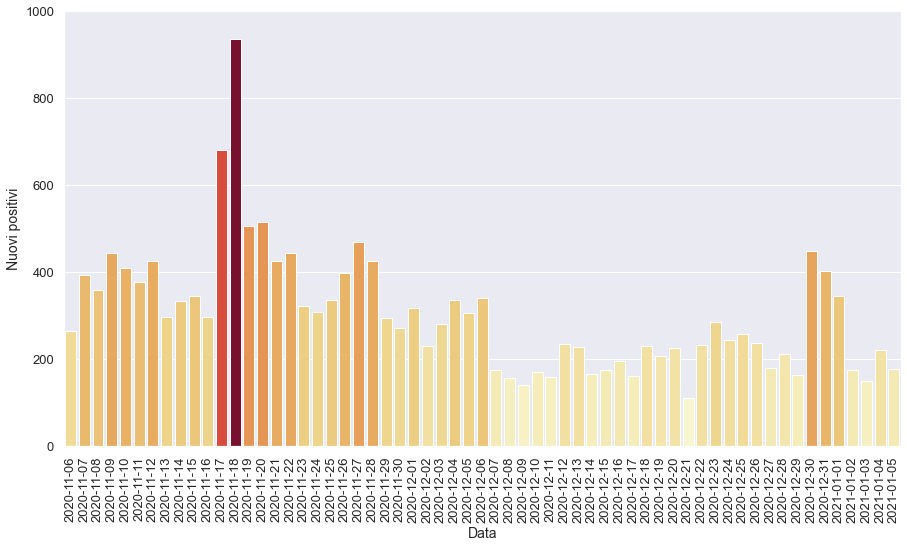

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

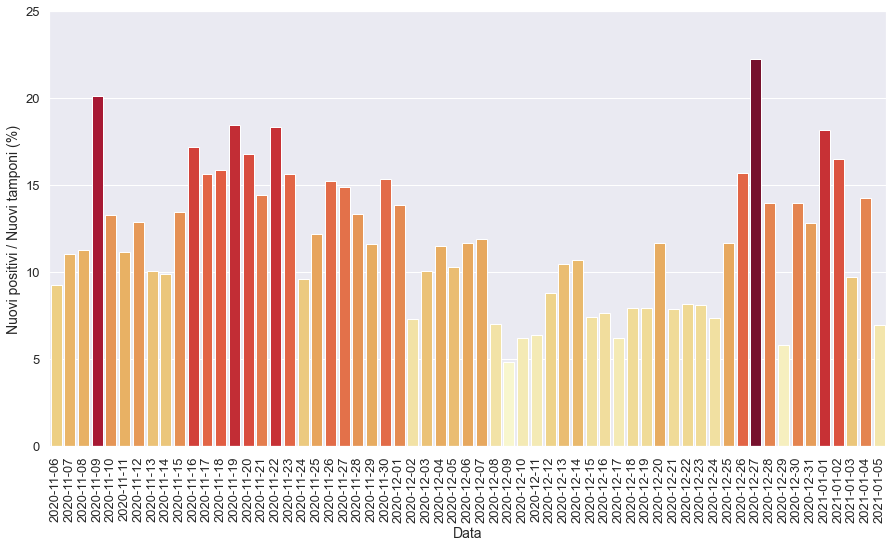

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

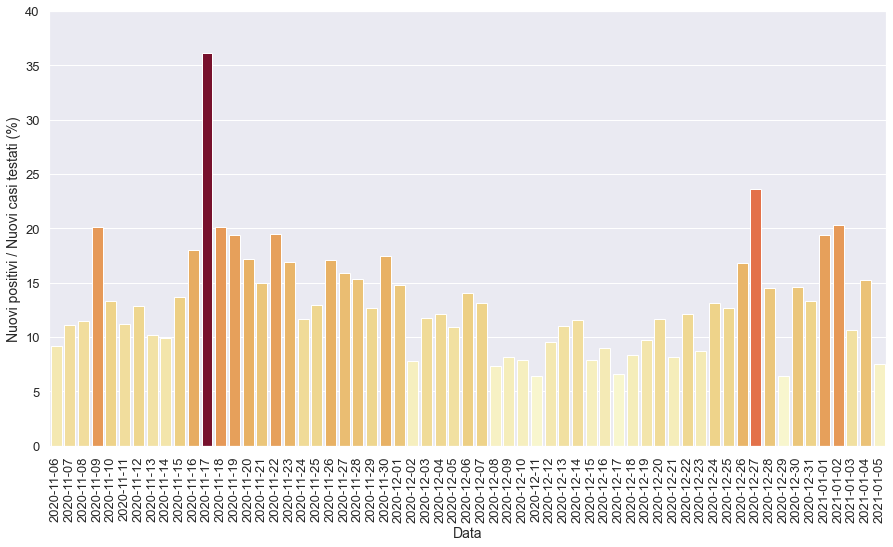

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

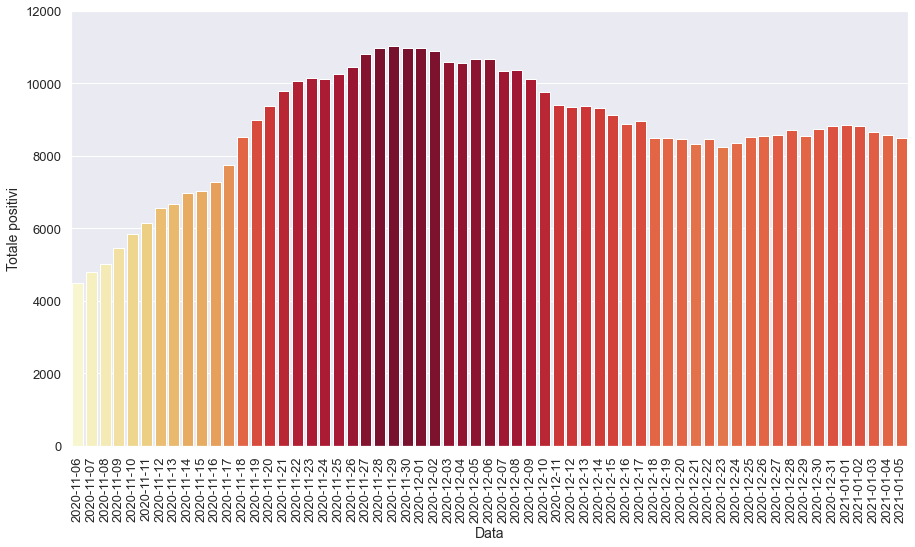

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

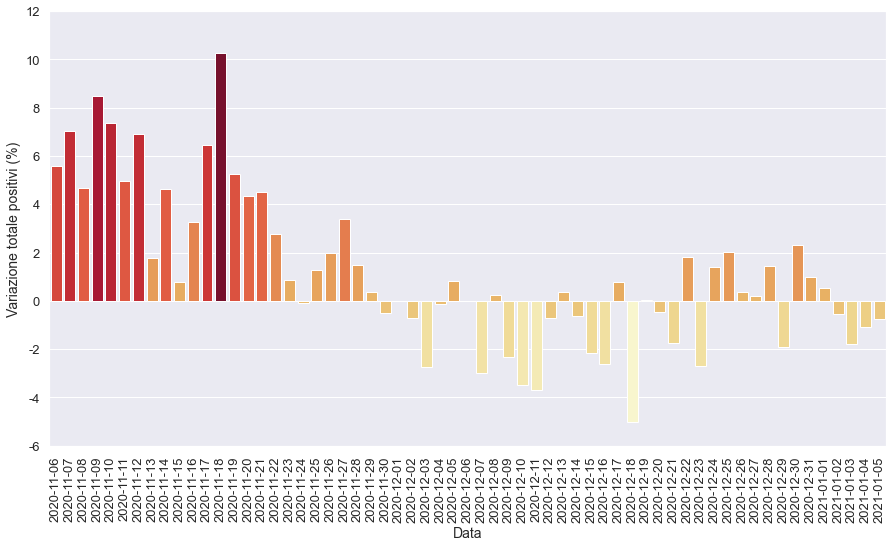

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

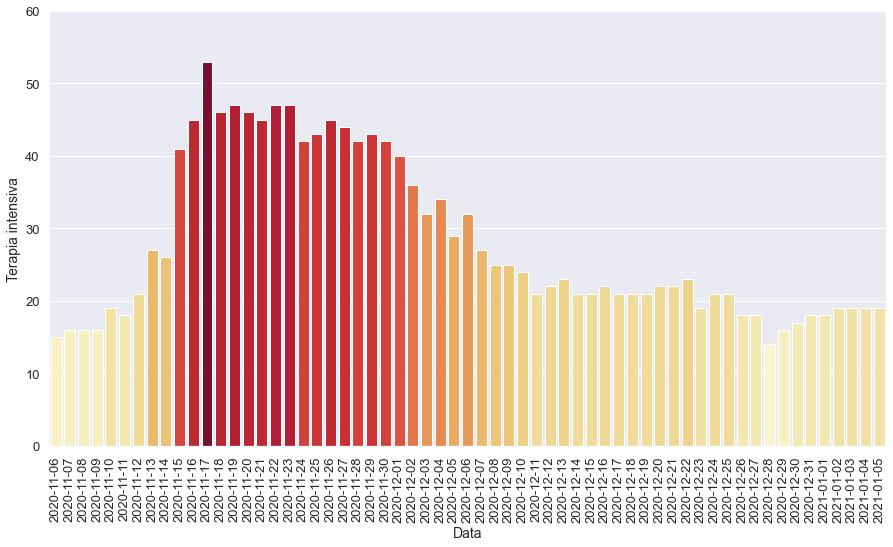

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

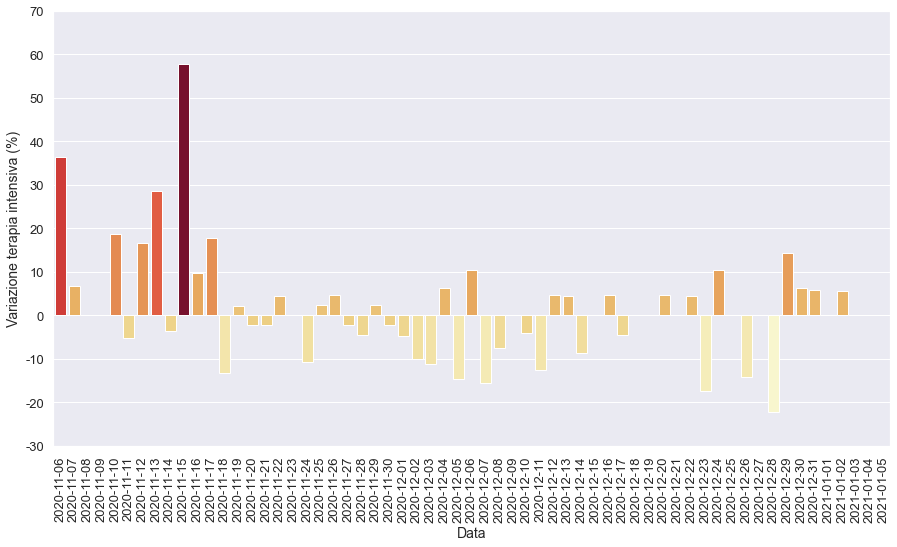

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

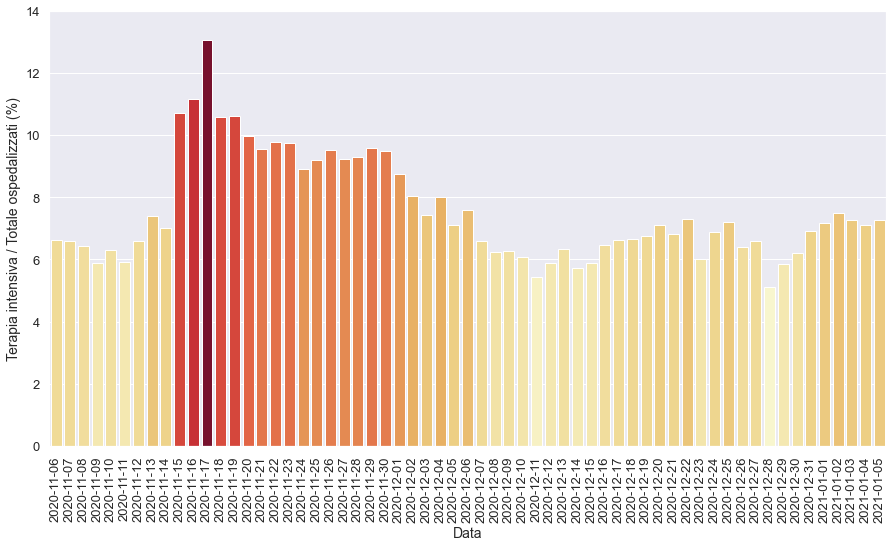

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

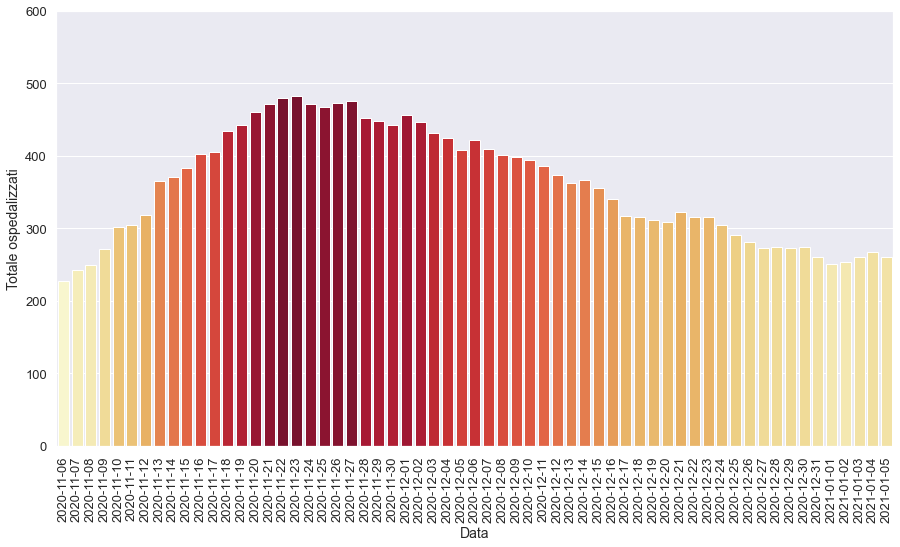

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

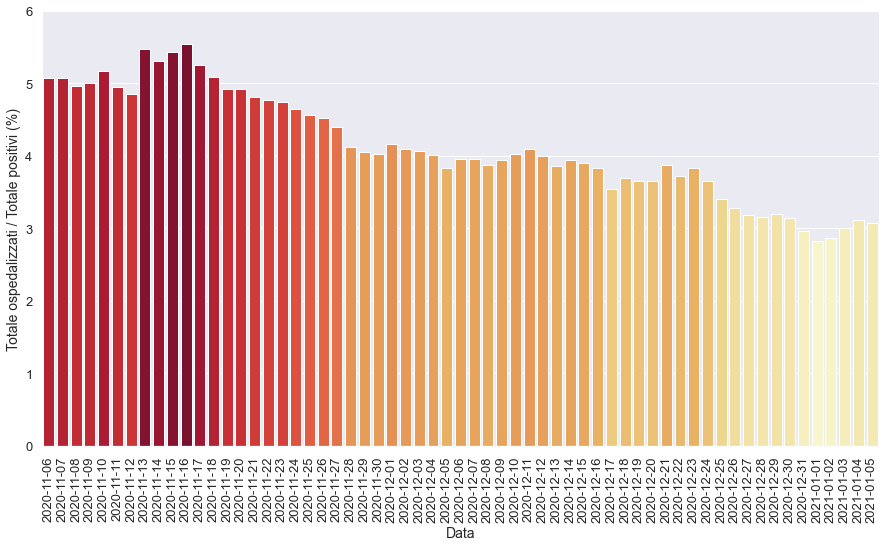

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

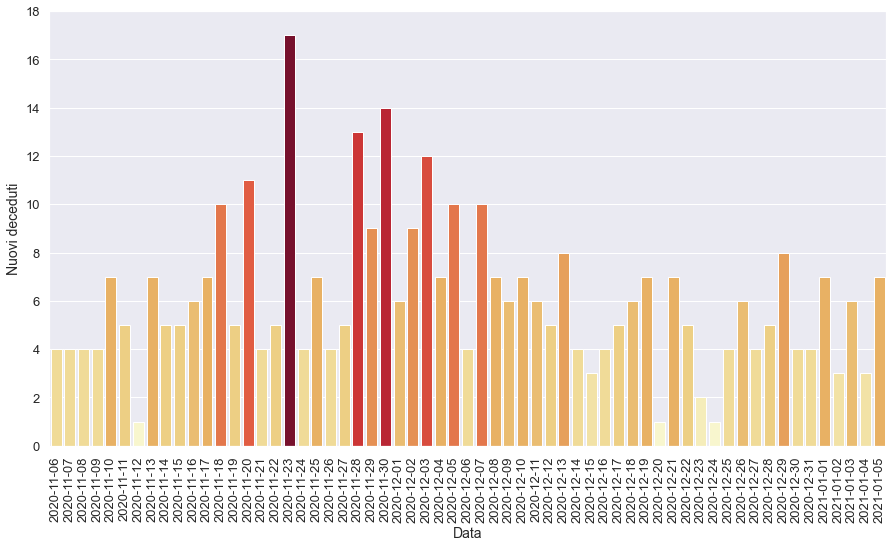

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

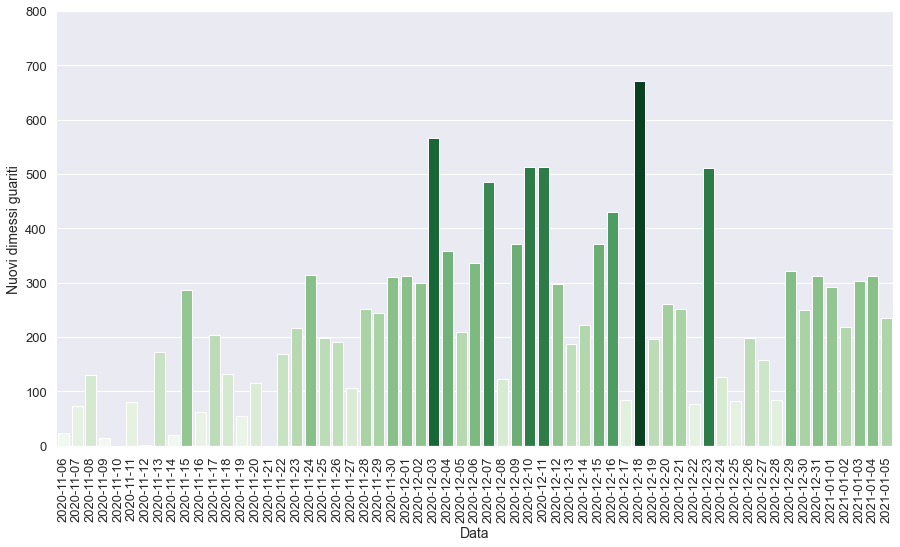

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,18,Calabria,390,32,422,10239,10661,-1,340,...,4.0,2922.0,2424.0,-15.0,7.58,3.96,11.64,14.03,10.34,-0.01
1,2020-12-07T17:00:00,18,Calabria,382,27,409,9932,10341,-320,175,...,10.0,1476.0,1329.0,-307.0,6.60,3.96,11.86,13.17,-15.62,-3.00
2,2020-12-08T17:00:00,18,Calabria,376,25,401,9965,10366,25,155,...,7.0,2209.0,2109.0,33.0,6.23,3.87,7.02,7.35,-7.41,0.24
3,2020-12-09T17:00:00,18,Calabria,374,25,399,9728,10127,-239,139,...,6.0,2893.0,1693.0,-237.0,6.27,3.94,4.80,8.21,0.00,-2.31
4,2020-12-10T17:00:00,18,Calabria,370,24,394,9382,9776,-351,169,...,7.0,2732.0,2154.0,-346.0,6.09,4.03,6.19,7.85,-4.00,-3.47
5,2020-12-11T17:00:00,18,Calabria,365,21,386,9030,9416,-360,158,...,6.0,2481.0,2471.0,-352.0,5.44,4.10,6.37,6.39,-12.50,-3.68
6,2020-12-12T17:00:00,18,Calabria,352,22,374,8975,9349,-67,235,...,5.0,2674.0,2465.0,-55.0,5.88,4.00,8.79,9.53,4.76,-0.71
7,2020-12-13T17:00:00,18,Calabria,339,23,362,9020,9382,33,228,...,8.0,2179.0,2061.0,45.0,6.35,3.86,10.46,11.06,4.55,0.35
8,2020-12-14T17:00:00,18,Calabria,346,21,367,8955,9322,-60,166,...,4.0,1551.0,1435.0,-65.0,5.72,3.94,10.70,11.57,-8.70,-0.64
9,2020-12-15T17:00:00,18,Calabria,335,21,356,8766,9122,-200,175,...,3.0,2354.0,2211.0,-189.0,5.90,3.90,7.43,7.91,0.00,-2.15


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

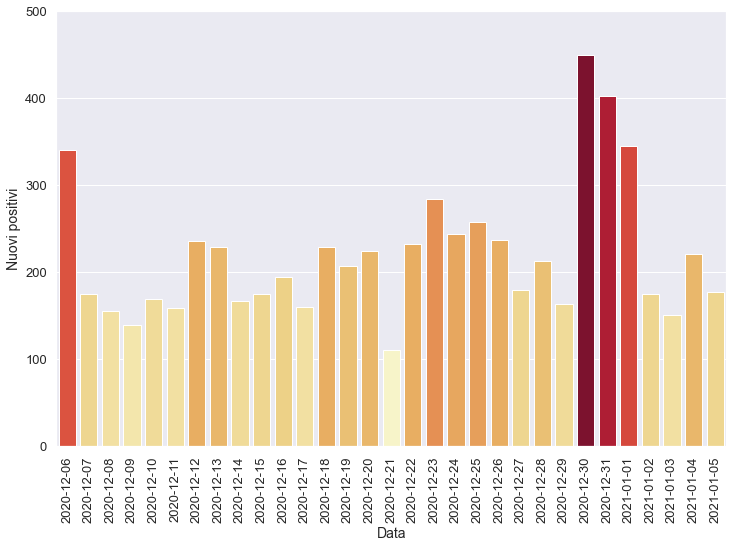

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

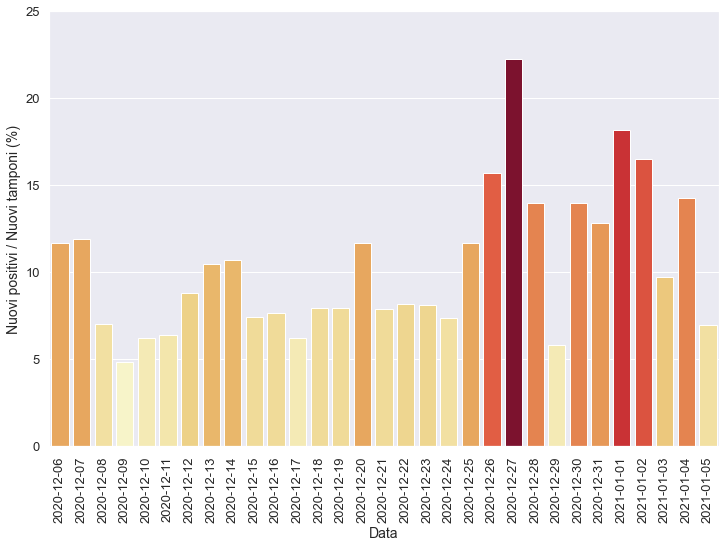

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

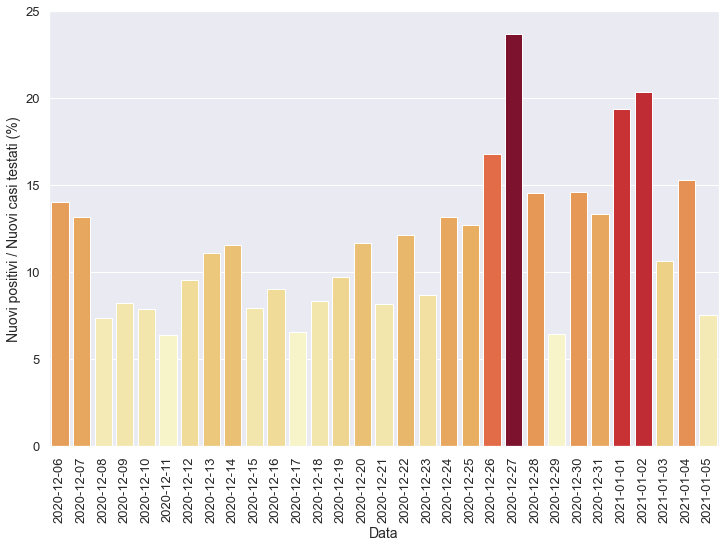

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

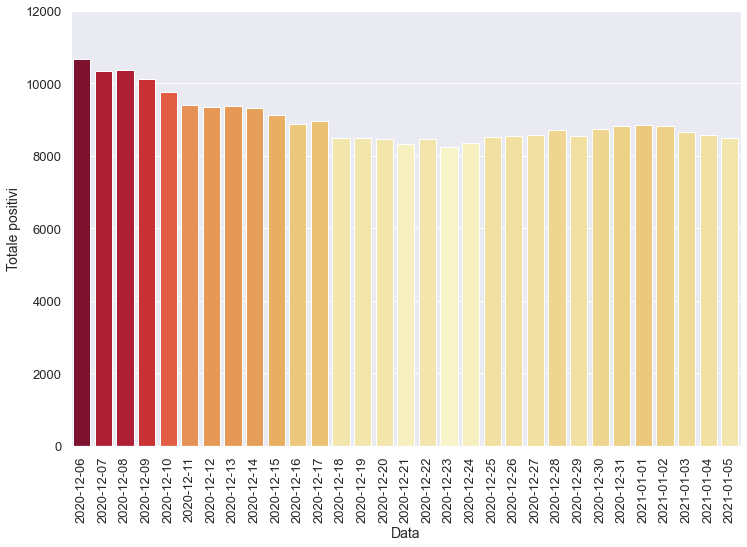

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

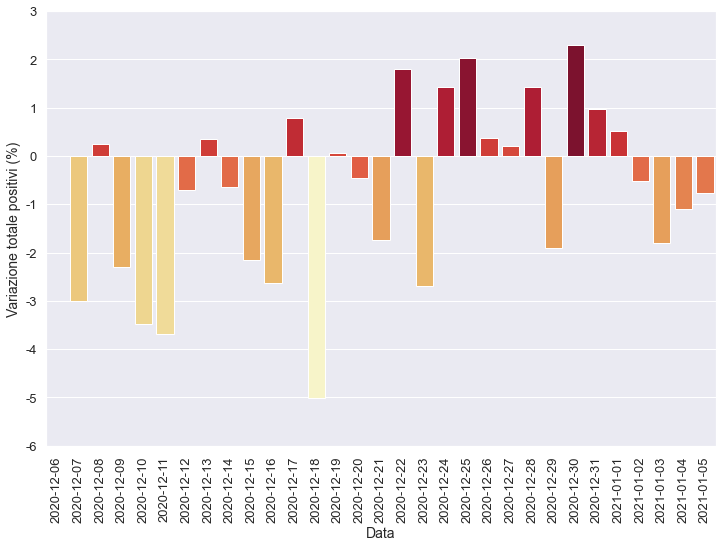

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

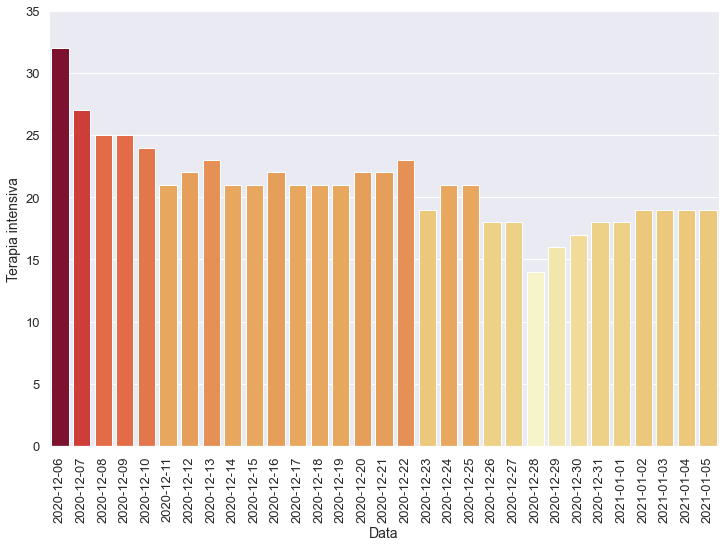

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

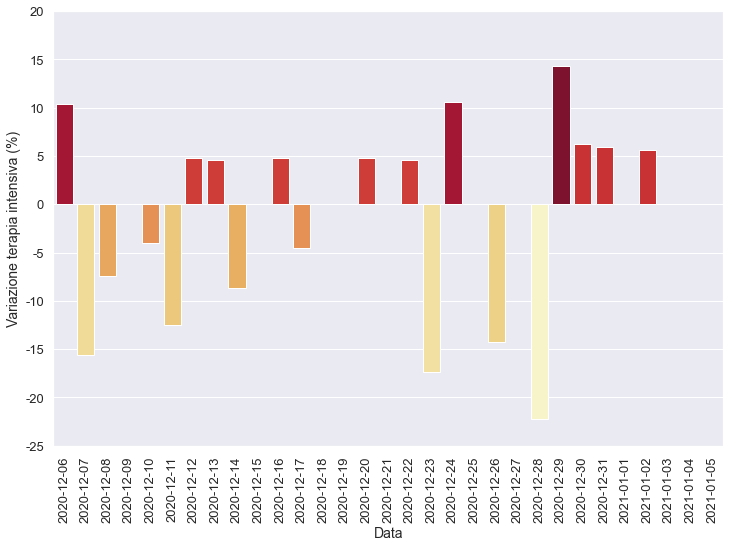

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

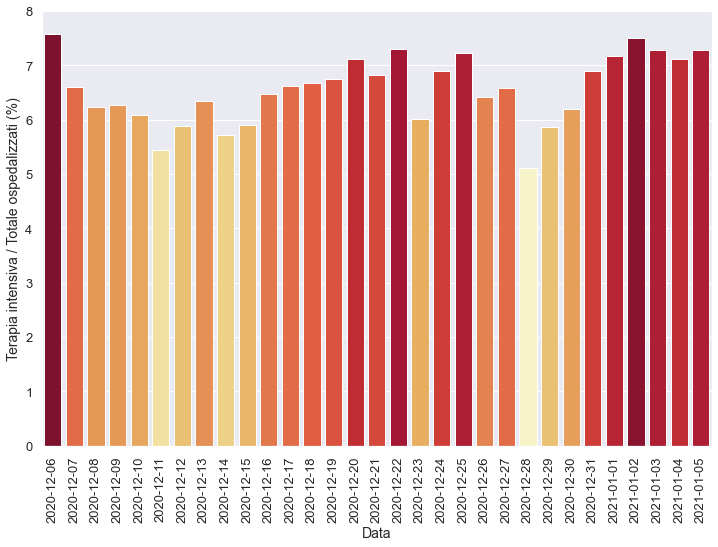

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

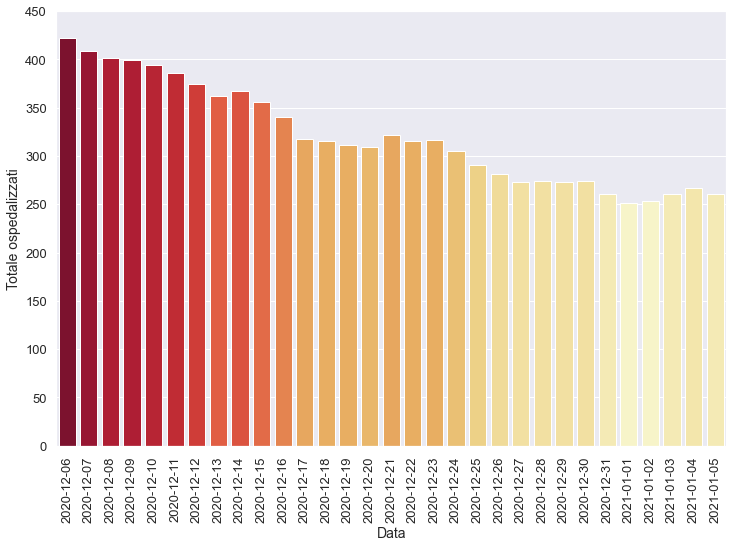

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

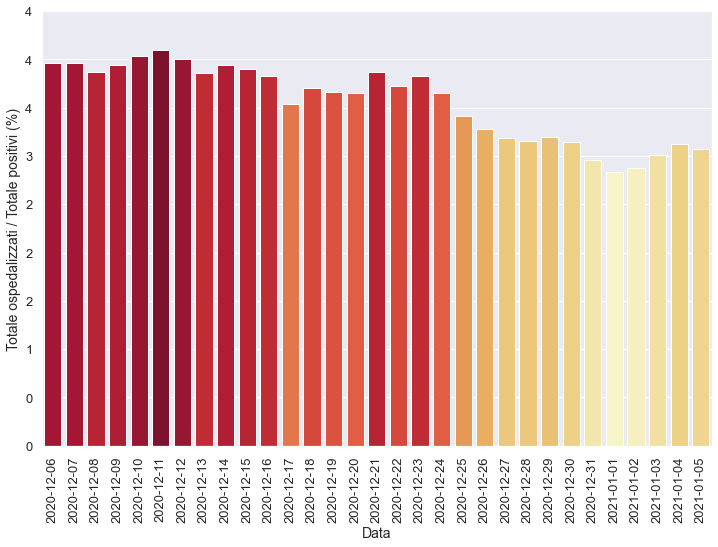

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

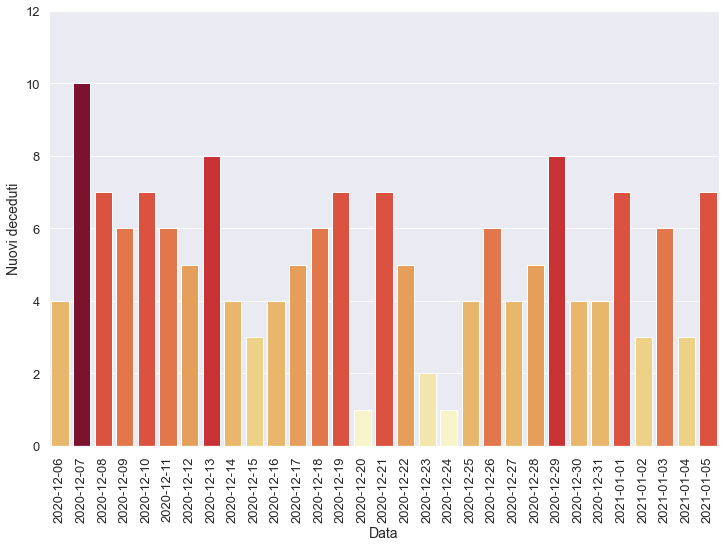

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

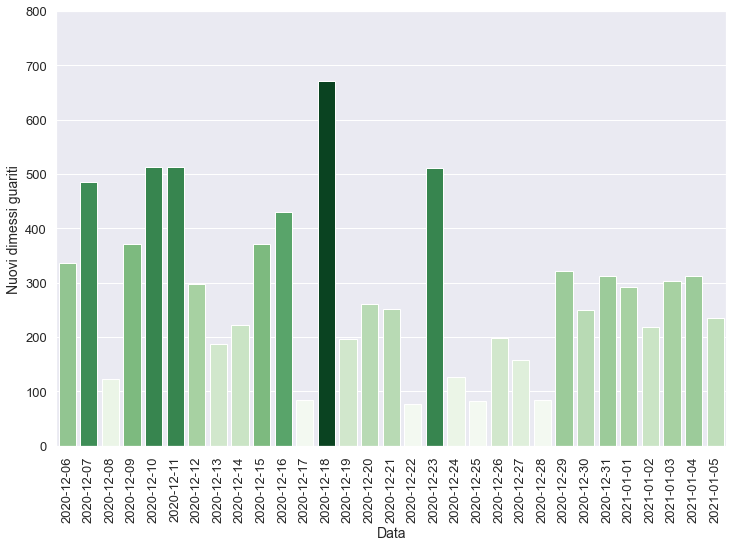

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-29T17:00:00,18,Calabria,257,16,273,8262,8535,-166,163,...,8.0,2808.0,2534.0,-165.0,5.86,3.20,5.80,6.43,14.29,-1.91
1,2020-12-30T17:00:00,18,Calabria,257,17,274,8457,8731,196,449,...,4.0,3217.0,3081.0,195.0,6.20,3.14,13.96,14.57,6.25,2.30
2,2020-12-31T17:00:00,18,Calabria,243,18,261,8556,8817,86,402,...,4.0,3146.0,3015.0,99.0,6.90,2.96,12.78,13.33,5.88,0.98
3,2021-01-01T17:00:00,18,Calabria,233,18,251,8612,8863,46,345,...,7.0,1903.0,1782.0,56.0,7.17,2.83,18.13,19.36,0.00,0.52
4,2021-01-02T17:00:00,18,Calabria,234,19,253,8563,8816,-47,175,...,3.0,1063.0,860.0,-49.0,7.51,2.87,16.46,20.35,5.56,-0.53
5,2021-01-03T17:00:00,18,Calabria,242,19,261,8396,8657,-159,150,...,6.0,1546.0,1411.0,-167.0,7.28,3.01,9.70,10.63,0.00,-1.80
6,2021-01-04T17:00:00,18,Calabria,248,19,267,8296,8563,-94,221,...,3.0,1554.0,1447.0,-100.0,7.12,3.12,14.22,15.27,0.00,-1.09
7,2021-01-05T17:00:00,18,Calabria,242,19,261,8237,8498,-65,177,...,7.0,2553.0,2351.0,-59.0,7.28,3.07,6.93,7.53,0.00,-0.76


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

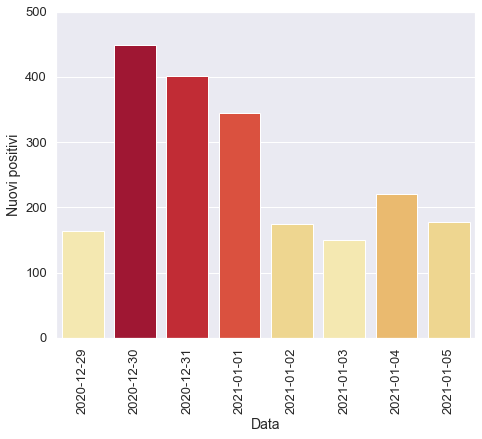

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

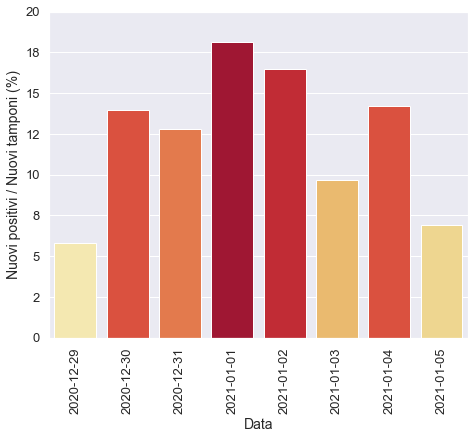

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

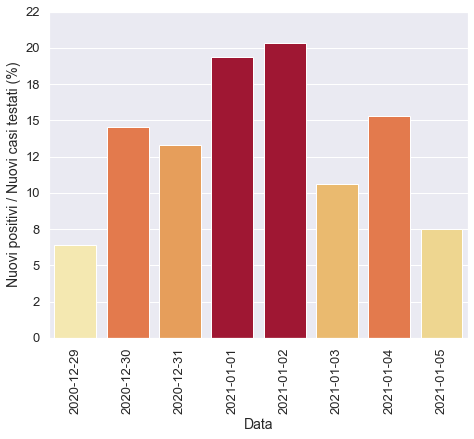

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

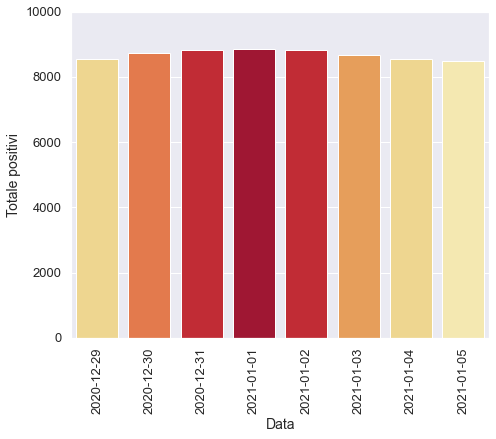

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

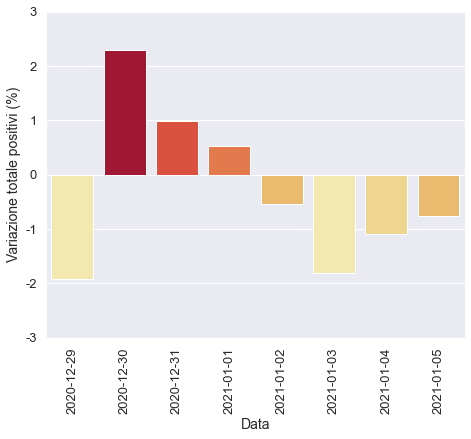

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

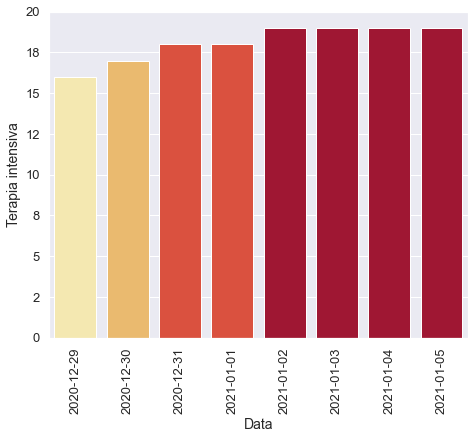

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

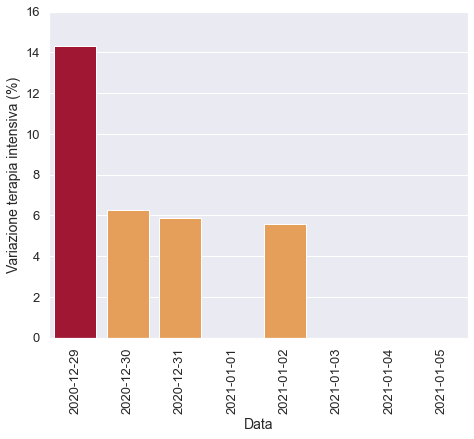

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

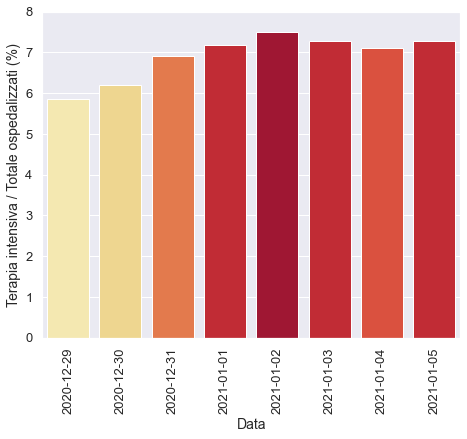

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

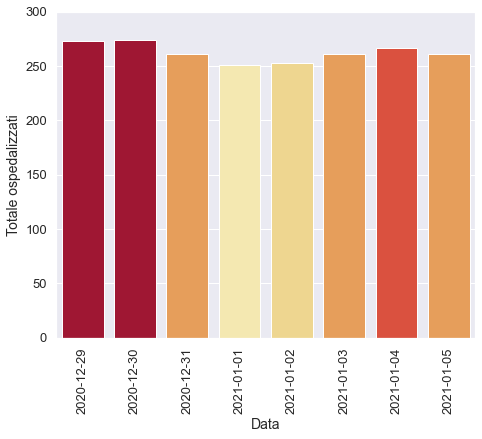

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

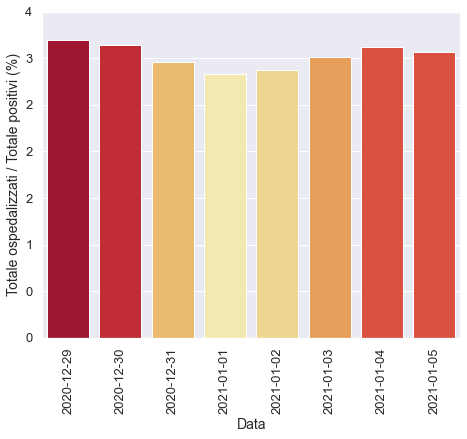

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

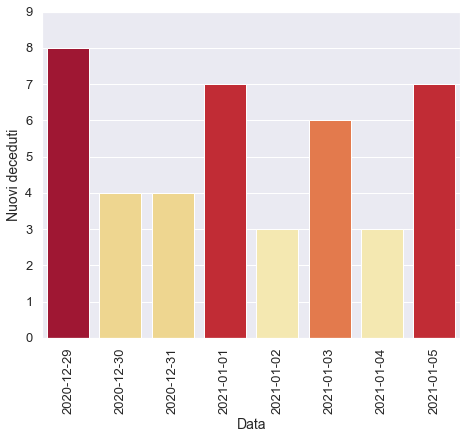

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

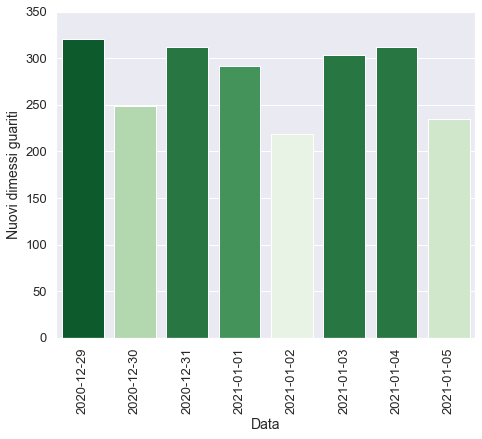

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)